In [56]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)

In [57]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# DHCP

In [63]:
data_frame_dhcp = pd.read_csv("dynamic_ip.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame_dhcp1=pd.read_csv("dynamic_one.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame_dhcp1.describe()



,time_ms,current_mA
count,1985.000000,1985.000000
mean,284306.614610,69.808300
std,1587.950505,9.076835
min,281559.000000,1.222730
25%,282933.000000,68.577270
50%,284307.000000,68.968180
75%,285681.000000,69.877280
max,287054.000000,145.454540


<ipython-input-52-c8159f8a37d1>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(df_dhcp.time_ms[:, None], df_dhcp.current_mA[:, None], label="Current [mA]")


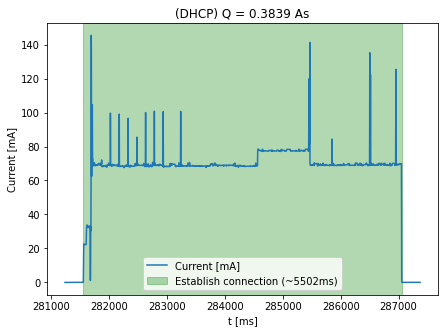

In [52]:
df_dhcp = data_frame_dhcp[5234:7454]
plt.title("(DHCP) " + calc_load_coulomb_str(df_dhcp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_dhcp.time_ms[:, None], df_dhcp.current_mA[:, None], label="Current [mA]")
plt.axvspan(281555, 287057, color='green', alpha=0.3, label="Establish connection (~5502ms)")
plt.legend()
plt.show()

# Static 

In [33]:
data_frame_static = pd.read_csv("static_ip.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame_static.describe()

,time_ms,current_mA
count,13560.000000,13559.000000
mean,51863.394395,46.916368
std,11322.117722,32.815881
min,70.000000,-11.022730
25%,43119.250000,0.045450
50%,52269.500000,68.400000
75%,61401.500000,69.177270
max,70566.000000,145.454540


<ipython-input-51-523e2d6fe2c0>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(df_static.time_ms[:, None], df_static.current_mA[:, None], label="Current [mA]")


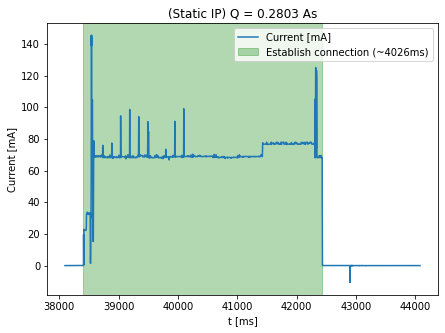

In [51]:
df_static = data_frame_static[1530:3750]
plt.title("(Static IP) " + calc_load_coulomb_str(df_static))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_static.time_ms[:, None], df_static.current_mA[:, None], label="Current [mA]")
plt.axvspan(38409, 42435, color='green', alpha=0.3, label="Establish connection (~4026ms)")
plt.legend()
plt.show()
# plt.title("(Wakeup for DTIM [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_dtim))
# plt.xlabel("t [ms]")
# plt.ylabel("Current [mA]")
# plt.plot(df_dtim.time_ms[:, None], df_dtim.current_mA[:, None], label="Current [mA]")
# plt.axvspan(12804, 12905, color='red', alpha=0.3, label="DTIM (Beacon interval: 100ms)")
# plt.legend(loc="upper left")
# plt.show()